# Blazing fast performance on 1 Trillion Rows

**Environment Details** 
<br>SQL Server 2019 
<br>Windows Server 2016 
<br>8-Socket (224 cores, 12TB RAM and 200TB+ SSD storage) Lenovo Server (ThinkSystem SR950) using Intel Cascade Lake processors 

This query runs a TPC-H query on a table with **1 trillion rows**.

In [3]:
select 
    SERVERPROPERTY('Edition') as Edition, 
    SERVERPROPERTY('ProductVersion') as ProductVersion, 
    (physical_memory_kb/(1024*1024)) as [Physical Memory (GB)], 
    cpu_count as [CPU Count], cores_per_socket [Cores Per Socket], 
    numa_node_count as [Numa Node Count], 
    socket_count [Socket Count] 
from sys.dm_os_sys_info

(1 row affected)

Total execution time: 00:00:00.057

Edition,ProductVersion,Physical Memory (GB),CPU Count,Cores Per Socket,Numa Node Count,Socket Count
Enterprise Edition (64-bit),15.0.1800.32,12287,448,28,8,8


# Query Execution (with Disk IO)
Executing the query against a trillion rows

In [7]:
SELECT	L_RETURNFLAG,
	L_LINESTATUS,
	SUM(L_QUANTITY)					AS SUM_QTY,
	SUM(L_EXTENDEDPRICE)				AS SUM_BASE_PRICE,
	SUM(L_EXTENDEDPRICE*(1-L_DISCOUNT))		AS SUM_DISC_PRICE,
	SUM(L_EXTENDEDPRICE*(1-L_DISCOUNT)*(1+L_TAX))	AS SUM_CHARGE,
	AVG(L_QUANTITY)					AS AVG_QTY,
	AVG(L_EXTENDEDPRICE)				AS AVG_PRICE,
	AVG(L_DISCOUNT)					AS AVG_DISC,
	COUNT_BIG(*)					AS COUNT_ORDER
FROM	LINEITEM
WHERE	L_SHIPDATE	<= dateadd(dd, -84, cast('1998-12-01'as date))
GROUP	BY	L_RETURNFLAG,
		L_LINESTATUS
ORDER	BY	L_RETURNFLAG,
		L_LINESTATUS

(4 rows affected)

Total execution time: 00:03:54.745

L_RETURNFLAG,L_LINESTATUS,SUM_QTY,SUM_BASE_PRICE,SUM_DISC_PRICE,SUM_CHARGE,AVG_QTY,AVG_PRICE,AVG_DISC,COUNT_ORDER
A,F,6607498422967.00,9907944790073789.01,9412534887542805.5029,9789033542413688.460306,25.499849,38237.027384,0.050001,259119117459
N,F,172490750754.00,258648998956769.81,245716194671224.9925,255546008060751.851842,25.500349,38237.643650,0.050004,6764250468
N,O,13059206961084.00,19582291240784926.26,18603181042211704.5621,19347316948124666.963125,25.500049,38237.344944,0.049999,512124763608
R,F,6607437171988.00,9907852600116816.38,9412459553931927.4868,9788956809985580.060997,25.499869,38237.056271,0.049999,259116510688


## Execution statistics
Table 'LINEITEM'. Scan count 789, **logical reads 3530482**, physical reads 640, page server reads 0, **read-ahead reads 3311687**, page server read-ahead reads 0, **lob logical reads 1456699924**, **lob physical reads 17516807**, lob page server reads 0, **lob read-ahead reads 249852410**, lob page server read-ahead reads 0.

Table 'LINEITEM'. Segment reads 1504451, segment skipped 0.

Table 'Worktable'. Scan count 0, logical reads 0, physical reads 0, page server reads 0, read-ahead reads 0, page server read-ahead reads 0, lob logical reads 0, lob physical reads 0, lob page server reads 0, lob read-ahead reads 0, lob page server read-ahead reads 0.

Read Throughput for physical disk I/O: <font color ="red">**~24Gb/sec**</font>

Rows processed per second: <font color="red">**448,717,9024 rows/sec** (*Over a 400 million rows per second*)</font>



## Disk IO and CPU usage numbers from perfmon

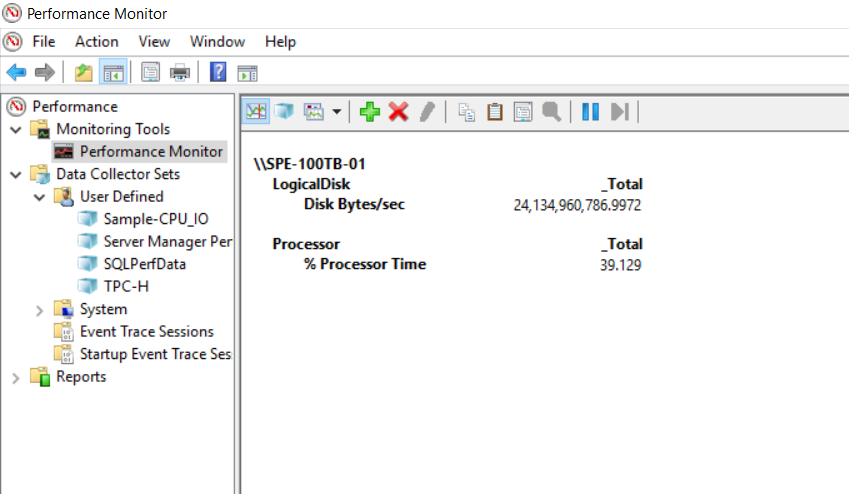

In [1]:
from IPython.display import Image
Image(filename="Perfmon_Cold.PNG")

## A view of the Disk IO in perfmon while the query is executing

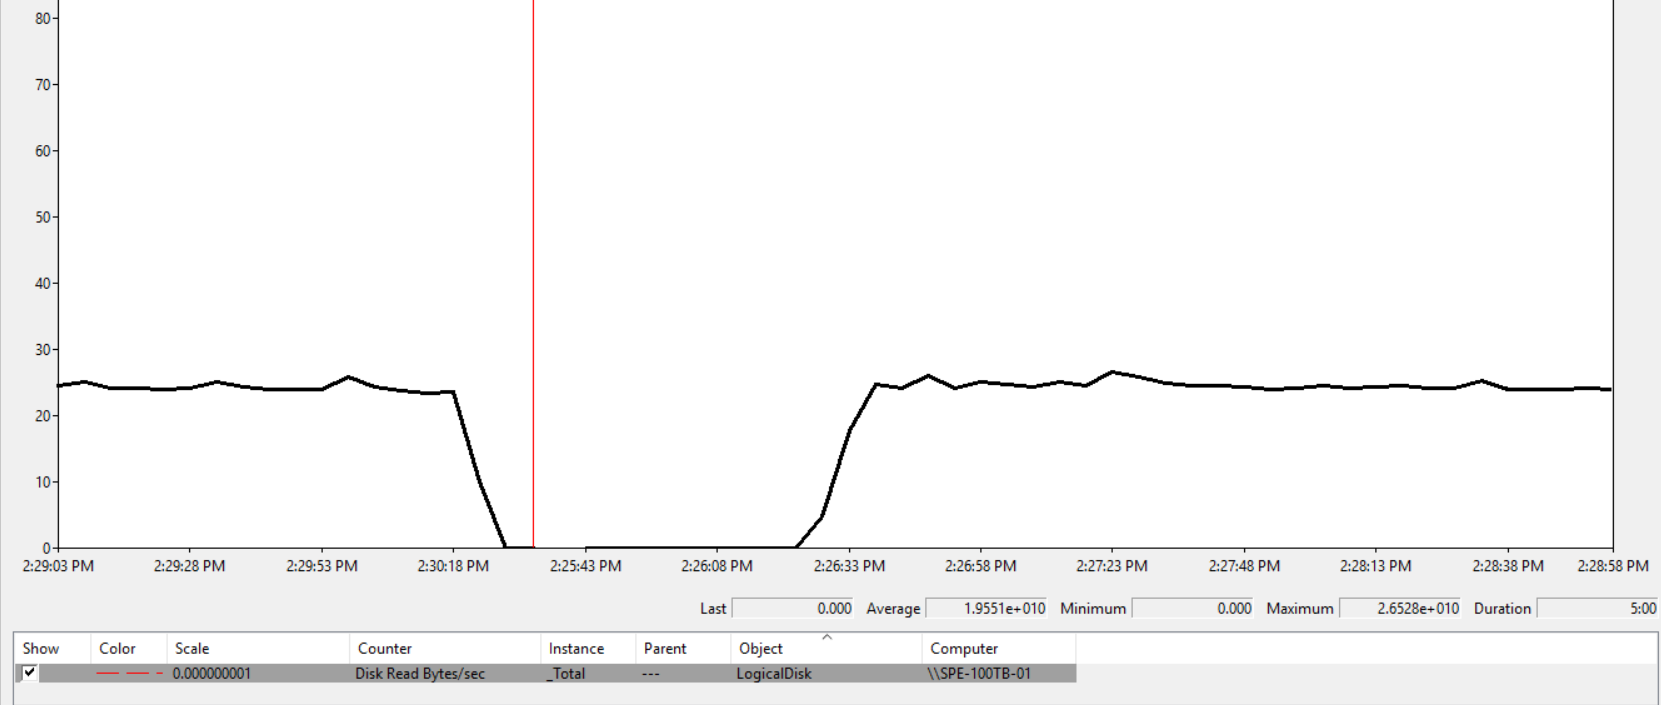

In [3]:
from IPython.display import Image
Image(filename="PerfmonDiskIO_Cold.png")

# Table Details

## LINEITEM
RAW DATA: **~146 TB**

COMPRESSED DATA SIZE: **~54 TB**

ROWS: **1,049,999,891,699**

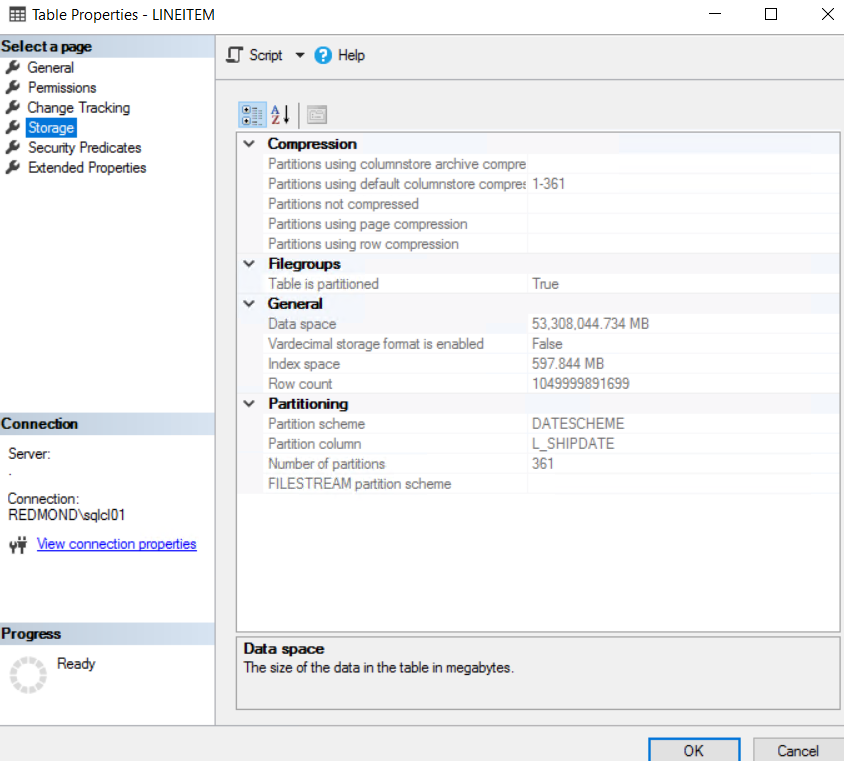

In [1]:
from IPython.display import Image
Image(filename="TableStorage.png")